<a href="https://colab.research.google.com/github/NicKostii/UniProjects/blob/main/IDA/Lab_work_5_(IDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабороторна робота №5
Тема: Побудова та оцінювання ансамблiв моделей засобами бібліотеки Scikit-Learn

Варіант 1   

Тюкалов Ніколай КА-13

# Хiд виконання роботи:
1. Початковi 2D-данi представити графiчно.
2. Розбити данi на навчальний, перевiрочний та тестовий набори. Перевiрочний
набiр використати для налаштування гiперпараметрiв. Тестовий набiр використати для остаточної оцiнки якостi моделей.

3. Побудувати ансамблi моделей, використовуючи наступнi методи (згiдно з
варiантом):

  - AdaBoostRegressor. Розглянути рiзнi значення n_estimators,
learning_rate та loss.

  В ансамблях Bagging, RandomForest, ExtraTrees, AdaBoost, GradientBoosting:

  - В якостi base_estimator / estimators використати одну/ кiлька моделей
iз параметрами по умовчанню: дерев рiшень, логiстичної регресiї, svm
тощо.

  - Побудувати графiки залежностi значень показника якостi ансамбля та iндивiдуальної моделi вiд n_estimators на однiй координатнiй вiсi. Такий графiк для iндивiдуальної моделi, очевидно, буде горизонтальною прямою.

  В задачах регресiї показником якостi можна обрати R2, MAPE або RMSE.

4. Побудувати графiки на однiй координатнiй площинi:
  - прогнозiв на основi ансамблю,
  - прогнозiв на основi окремої моделi base_estimator / estimators,
  - точок даних з перевiрочної / тестової множин.

5. Розрахувати значення змiщення та дисперсiї для окремої моделi та ансамблю.

6. Що можна сказати про час навчання ансамблю порiвняно з окремими моделями, якi утворюють цi ансамблi?

7. Зробити висновки. Чи краще на заданих даних виконується ансамбль порiвняно з iндивiдуальними моделями?

# Завдання

AdaBoostRegressor. Розглянути рiзнi значення параметрiв n_estimators,
learning_rate та loss цього алгоритму.

# Початкові дані

(а)

    sklearn.datasets.make_friedman2


# AdaBoost

AdaBoost (Adaptive Boosting) є алгоритмом машинного навчання, який використовується для задачі класифікації, тобто розподілу об'єктів на кілька категорій. Цей алгоритм є формою ансамблевого навчання, де декілька слабких моделей об'єднуються для створення потужної моделі класифікації. Слабкі моделі зазвичай називаються "класифікаторами верхнього рівня" (weak learners).

Основна ідея AdaBoost полягає в тому, щоб навчати послідовно кілька слабких моделей і надавати більший вагомий вплив прикладам, які були неправильно класифіковані попередніми моделями. Процес відбувається у формі ітерацій: на кожному кроці ваги прикладів змінюються так, щоб найбільший вплив справлявся на помилкові класифікації.

Недоліком AdaBoost є його обмежена можливість розпаралелювання, оскільки кожен новий прогнозатор може бути навчений лише після завершення навчання попереднього. Це робить метод менш ефективним у використанні ресурсів порівняно з іншими ансамблевими методами, такими як беггінг або вставка, які можуть використовувати паралельні обчислення для швидкого навчання моделей

Етапи:

- Навчання першого класифікатора: Перший слабкий класифікатор (зазвичай дерево рішень) навчається на навчальному наборі, і ваги прикладів оновлюються відповідно до його помилок.

- Навчання на основі оновлених ваг: Далі, на кожному етапі, новий класифікатор навчається на навчальному наборі, де ваги прикладів враховують помилки попередніх класифікаторів.

- Оновлення ваг прикладів: Ваги прикладів оновлюються, збільшуючи вагу помилково класифікованих прикладів.

- Об'єднання прогнозаторів: Кожен новий класифікатор додається до ансамблю з вагою, що визначається його точністю.

- Узагальнення моделі: Після навчання всіх прогнозаторів ансамбль стає готовим до використання для класифікації нових прикладів.Спрогнозованим класом буде той, який отримує більшість зважених голосів.

Формули:  
Нажаль єдиний спосіб задавати формули в цьому середовищі це LaTeX, але я не вмію їм користуватися, тому, якщо ніто не проти, будуться просто скрнішоти.

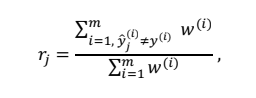

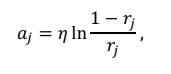

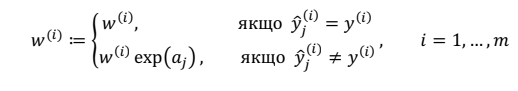


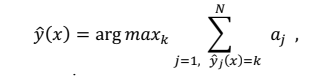

# Нобхідні бібліотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
from sklearn.datasets import make_friedman2
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

# Генерація даних

In [ ]:
X, y = make_friedman2(n_samples=1000, noise=0.1, random_state=42)

In [ ]:
df = pd.DataFrame(data=X, columns=['x1', 'x2', 'x3', 'x4'])
df['y'] = y

# Візуалізація (+Трохи препроцесінгу)

<Axes: >

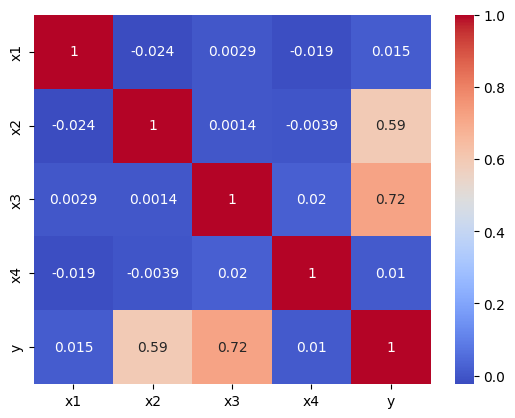

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",)

Як можна побачити з **y** корелюють лише дві колонки **x2** та **x3**. Колонки **х1** та **х4** не несують корисної нформації, тому їх можна викинути.

In [ ]:
df.drop(columns = ['x1','x4'], inplace = True)

Давайте знову глянемо на нашу дату та побачимо такий дуже файний діагональний градіент і можем овже зробити прогноз, що можна побудувати дуже гарну модель. Неформально можно зформулювати модель настпуним чином "чим ближче точка до верхнього правого кута, ти більше її значення".

<Axes: xlabel='x2', ylabel='x3'>

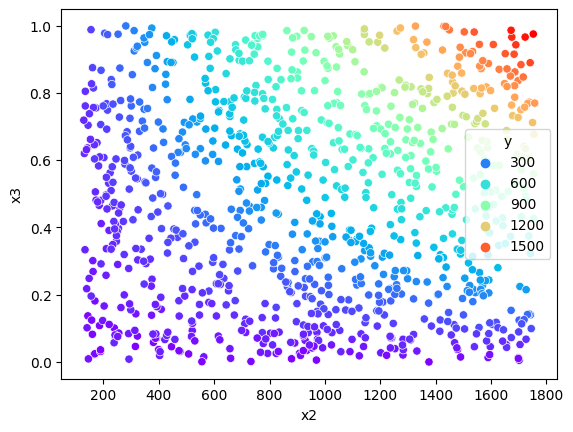

In [ ]:
sns.scatterplot(x= df['x2'], y=df['x3'], hue = df['y'], palette = 'rainbow')

# Розбиття даних

Розіб'ємо дані на тренувальні, перевірочні та тестові підмножини. Так як одразу на три групи розбити train_test_split не дозволяє, то робимо в два заходи та отримуємо наші шукані три підмножини з пропорцією 50/25/25.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['x2', 'x3']], df['y'], test_size=0.5, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Побудова ансамбля
Згідно умовам роботи та варіанту побудуємо модель регресії використовуючи AdaBoostRegressor. Необхідно погратися з параметрами n_estimators, learning_rate та loss, а також обрати базову модель estimator.

Треба імпортнути моделі які ми плануємо спробувти використати як базову. Я планую спробувати використати дерева рішень, лінійну регресію, опорні вектори та K-найближжчих сусідів.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

Для оцінки моделі зараз та далі ми ьудемо використовувати настпні метрики:   
R^2 - вимірює можливість моделі пояснити варіацію даних, 0 - неожливість (дуже погано), 1 - пояснює всю варіацію (ідеально);  
RMSE - корінь з средньої квадратиччної помилки, менше - краще;  
MAPE - середній абсолютний відсоток помилки, менше - краще;  
MAE - середня абсолютна посилка, менеше - краще.

Давайте напишемо функцію, щоб не писати вивод всіх цих метрик руками кожного разу.

In [ ]:
def stats(X, y, m):
  print(f'R^2: {r2_score(y, m.predict(X))}\nRMSE: {np.sqrt(mean_squared_error(y, m.predict(X)))}\nMAPE: {mean_absolute_percentage_error(y, m.predict(X))}\nMAE: {mean_absolute_error(y, m.predict(X))}')

Тепер побудуємо декілька моделей. Спочатку пограємося саме з базовою моделлю щоб зрозуміти яка з них буде працювати краще. Я залишаю моделі з дефолтними параметрами, щоб побачити самі те наскільки гарно модель підходить до поточного датасету, а не те наскільки я знаю краще відповідну модель та вмію задати парметри.

## Вибір одиночної моделі для основи

In [ ]:
%%time
dt = DecisionTreeRegressor()
dt.fit(X_test, y_test)
stats(X_train, y_train, dt)

R^2: 0.9711594740658267
RMSE: 65.10905990931299
MAPE: 0.22084961285934201
MAE: 44.38883551539735
CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 25.1 ms


In [ ]:
%%time
lr = LinearRegression()
lr.fit(X_test, y_test)
stats(X_train, y_train, lr)

R^2: 0.8599870716305911
RMSE: 143.45771406989985
MAPE: 0.8229009670863534
MAE: 106.59444944340473
CPU times: user 17.5 ms, sys: 953 µs, total: 18.5 ms
Wall time: 52.3 ms


In [ ]:
%%time
svr = SVR()
svr.fit(X_test, y_test)
stats(X_train, y_train, svr)

R^2: -0.01909737761896313
RMSE: 387.0327170672907
MAPE: 1.3629799843279606
MAE: 289.4549236718429
CPU times: user 67.5 ms, sys: 391 µs, total: 67.9 ms
Wall time: 71.5 ms


In [ ]:
%%time
kn = KNeighborsRegressor()
kn.fit(X_test, y_test)
stats(X_train, y_train, kn)

R^2: 0.17095394946830733
RMSE: 349.0833733967242
MAPE: 1.4810173854541282
MAE: 253.9388621148644
CPU times: user 20 ms, sys: 755 µs, total: 20.7 ms
Wall time: 30.3 ms


Отже дерево рішень є абсолтним фаворітом, і воно, до речі, і є дефолтним estimator для AdaBoostRegressor. Можна розглядати також Лінійну регресію. Метрик SVR та K-Neighbors абсолютно жахливі, ці алгоритми просто не підходять дял цього конкретного датасету.

## Побудова AdaBoost

Побудуємо тепер саму модель AdaBoost. Я бачу сенс спробувати лише на основі дерев (дефолт) або лінійної регресії, бо якшо метрики базової моделі погані, то й ансамбль буде поганим, отже SVR та K-Neighbors не розгляну.

In [ ]:
%%time
dt = DecisionTreeRegressor()
dt.fit(X_test, y_test)
stats(X_train, y_train, dt)

In [ ]:
ab_dt = AdaBoostRegressor(estimator = dt, random_state=42)
ab_dt.fit(X_train, y_train)
stats(X_val, y_val, ab_dt)

R^2: 0.9925658827730023
RMSE: 34.69344085057494
MAPE: 0.10818870333318512
MAE: 25.647389699651217


In [ ]:
ab_lr = AdaBoostRegressor(estimator = lr, random_state=42)
ab_lr.fit(X_train, y_train)
stats(X_val, y_val, ab_lr)

R^2: 0.8686145296344925
RMSE: 145.84996938114475
MAPE: 0.7097179988852917
MAE: 111.90696668472584


Дерево рішень знову домінує, тому відповідно, далі будемо розглядати лише дерево рішень.

## Дослідження впливу значення n_esimators на ансамбль та порівняння з індивідуальною моделлю

Перед тим, як ми налаштуємо гіперпараметри моделі, давайте поріняємо якість "дефолтних" ансамбля та одиночної моделі в залижності від кількіості естіматорів в анасамблі:

In [ ]:
dict_t = {}
for number in range(5, 150, 5):
  tm = AdaBoostRegressor(n_estimators=number, random_state=42)
  tm.fit(X_train, y_train)
  dict_t[number] = [r2_score(y_val, tm.predict(X_val)), r2_score(y_val, dt.predict(X_val))]

In [ ]:
np.array(list(dict_t.values()))[:,0]

array([0.94135232, 0.94844885, 0.96847838, 0.97040204, 0.97121117,
       0.97301263, 0.97349024, 0.97265536, 0.974241  , 0.97413239,
       0.97498448, 0.97581861, 0.97525224, 0.97494178, 0.97496018,
       0.975122  , 0.9762121 , 0.97647882, 0.97660612, 0.9769091 ,
       0.9769516 , 0.97733444, 0.97762527, 0.97742069, 0.97670704,
       0.976928  , 0.97677747, 0.97687077, 0.97673878])

<Axes: >

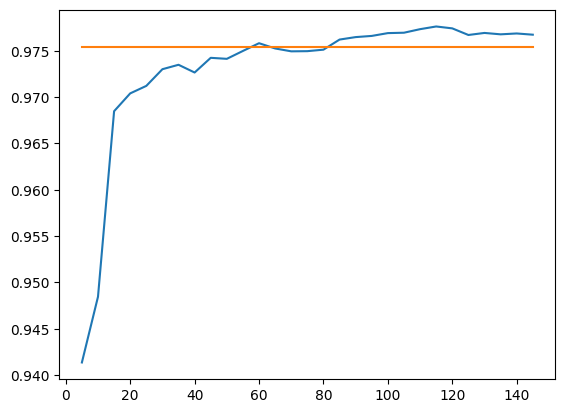

In [ ]:
sns.lineplot(x = np.array(list(dict_t.keys())), y = np.array(list(dict_t.values()))[:,0])
sns.lineplot(x = np.array(list(dict_t.keys())), y = np.array(list(dict_t.values()))[:,1])

МОжна побачити, що при невеликий кількості естиматорів, одиночна модель моказує навіть кращі результати (але варто пам'ятатиобидві моделі при будь якій кількості мають R^2>0.94, що супер гарно в будь якому випадку). Можно побачити що "пік" знаходиться десь в районі 120 естиматорів.

## GridSearch

Тепре використаємо GridSearch для підбору саме параметрів AdaBoost.

In [ ]:
param_grid = {
    'n_estimators': range(100, 150, 5),
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'loss': ['linear', 'square', 'exponential']
}
gs = GridSearchCV(ab_dt, param_grid, cv=5, scoring='r2')
gs.fit(X_val, y_val)

bm = gs.best_estimator_

In [ ]:
print(gs.best_params_)

{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 135}


In [ ]:
stats(X_train, y_train, bm)

R^2: 0.9909918114980798
RMSE: 36.38803213208476
MAPE: 0.13114874800310747
MAE: 27.042278816657113


In [ ]:
stats(X_val, y_val, bm)

R^2: 0.9998852315432321
RMSE: 4.310661723102536
MAPE: 0.01743629599688857
MAE: 1.3453798617679935


In [ ]:
stats(X_test, y_test, bm)

R^2: 0.9881693083397911
RMSE: 39.298750998650746
MAPE: 0.11423494351024502
MAE: 28.324118729118343


Як можна помітити, модель гарна. Вона напевно дещо перенавчена, бо результати на під дата сеті на якому настраювалися гіпер параметри иоже невіть занадто гарні, але в цілому показники дуже-дуже гарні.

# Графіки

Прогнозiв на основi ансамблю (тестова множина)

<Axes: xlabel='x2', ylabel='x3'>

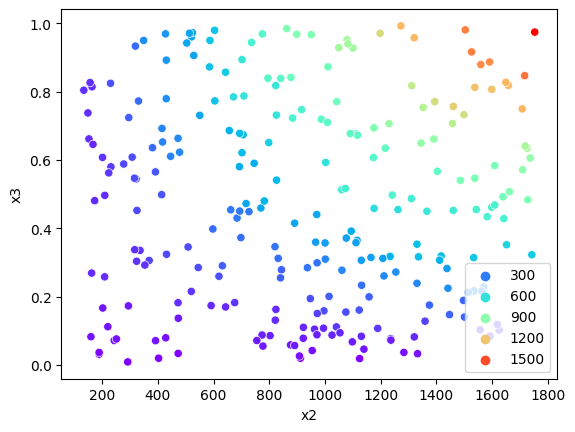

In [ ]:
pred = bm.predict(X_test)
sns.scatterplot(x= X_test['x2'], y=X_test['x3'], hue = pred, palette = 'rainbow')

Прогнози на основі індивідуальної моделі (тестова множина)

<Axes: xlabel='x2', ylabel='x3'>

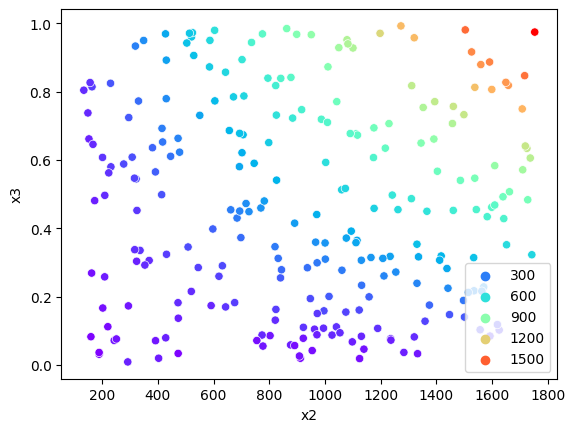

In [ ]:
pred_2 = dt.predict(X_test)
sns.scatterplot(x= X_test['x2'], y=X_test['x3'], hue = pred_2, palette = 'rainbow')

# Зміщення та дисперсія

Розрахуємо зміщення та дисперсію як для ансамбля так і для індивідуальної моделі. Спочатку імпортуємло бібліотеку для цього.

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

Розрахуємо для індивідуальної моделі:

In [ ]:
i_bias, i_var, _ = bias_variance_decomp(dt, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse')
print(f'Single model Bias: {i_bias}, Var: {i_var}')

Single model Bias: 2616.622617656005, Var: 635.897852625082


РОзрахуємо для ансамблю:

In [ ]:
a_bias, a_var, _ = bias_variance_decomp(ab_dt, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse')
print(f'Ansamble model Bias: {a_bias}, Var: {a_var}')

Ansamble model Bias: 1373.7042473202105, Var: 692.3635511555484


Отже дисперсія дуже схожа, а зміщення значно менше у ансамбля, що гарно. Отже можно сказати, що модель достатньо навчена (менший баяс), але також трохи перенавчена (трохи завищена дисперсія - чутливість до навчальних даних).

# Час

Заново побудуємо ансамбль та індивідууальну модель, але порівняємо час.

In [ ]:
%%time
n_ab = AdaBoostRegressor()
n_ab.fit(X_train, y_train)
n_ab.predict(X_val)

Wall time: 147 ms   
(я скопіював кусочок з стінки тексту в оутпуті, що цю саму стніку зайвого тексту прибрати)

In [ ]:
%%time
n_dt = DecisionTreeRegressor()
n_dt.fit(X_train, y_train)
n_dt.predict(X_val)

Wall time: 7.77 ms

Отже, часу зайняло типу в 20 раз більше, що дуже суттєво, тому варто тримати в голові, що ансамблі, очикувано, займають значно більше часу ніж індивідуальні моделі, але вони також, як правило, дають значно кращі результати, тому такий trade off часу на якість може бути дуже вигідним.

# Висновки

В цій роботі було опрацьовано ансамблі моделей, в часності AdaBoosRegressor.  Було проведено порівняння ансамблю з індивідуальними  моделями. В процесі роботи були етапи генерації, візуалізації, фільтрації даних.  Було подібрано оптимальні параметри.

Отже ансамблі дуже потужний інструмент який варто використовувати. Вони вимагають більших ресурсів ніж індивідуальні моделі, але здатні надати помітно кращі результати.